In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/img-insurance-spreadsheet/insurance_spreadsheet.png
/kaggle/input/data-for-datavis/fifa.csv
/kaggle/input/data-for-datavis/ign_scores.csv
/kaggle/input/data-for-datavis/spotify.csv
/kaggle/input/data-for-datavis/flight_delays.csv
/kaggle/input/data-for-datavis/iris_setosa.csv
/kaggle/input/data-for-datavis/insurance.csv
/kaggle/input/data-for-datavis/cancer.csv
/kaggle/input/data-for-datavis/cancer_b.csv
/kaggle/input/data-for-datavis/cancer_m.csv
/kaggle/input/data-for-datavis/iris_virginica.csv
/kaggle/input/data-for-datavis/iris.csv
/kaggle/input/data-for-datavis/iris_versicolor.csv
/kaggle/input/data-for-datavis/candy.csv
/kaggle/input/data-for-datavis/museum_visitors.csv


## Data Visualization - Pandas and Seaborn

## Line chart

**Setup**

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()  # ensure pd date-like values convert to be compatible with matplotlib date format
import matplotlib.pyplot as plt
# display plot inline in notebook
%matplotlib inline  
import seaborn as sns
print("Setup complete")

Setup complete


matplotlib.pyplot provides a more customizable and flexible plotting experience, suitable for a wide range of plot types. On the other hand, seaborn focuses on higher-level statistical visualizations and provides a simpler API with built-in stylistic choices. Depending on your needs, you can choose either library or even combine them to leverage their respective strengths.

**Load the data**

In [3]:

import os

# data file path
#file_path_spotify = "/kaggle/input/data-for-datavis/spotify.csv"
file_path_museum_visitors = "/kaggle/input/data-for-datavis/museum_visitors.csv"


# read the data file
museum_data = pd.read_csv(file_path_museum_visitors, index_col="Date", parse_dates=True)


## Bar chart and Heat map

Setup complete.


Text(0, 0.5, 'Arrival delay (in minutes)')

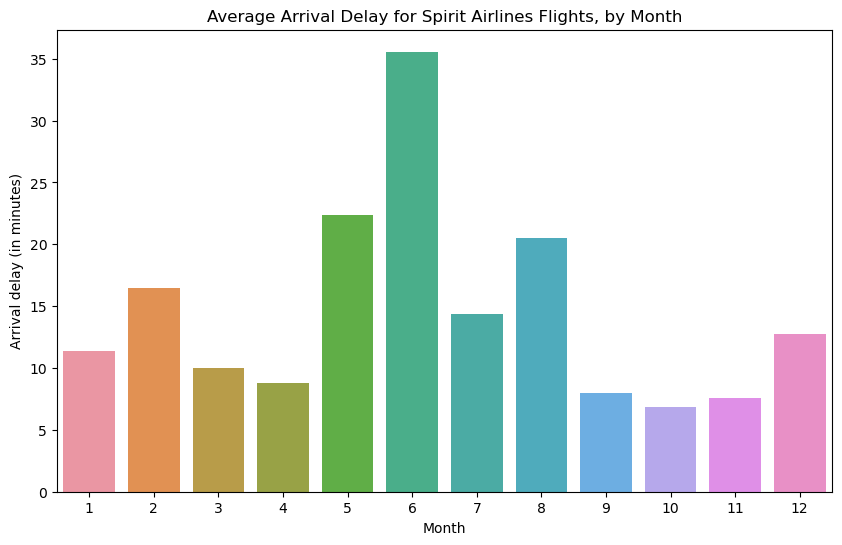

In [4]:
#----------------------
# Set up the notebook
#----------------------
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup complete.")

#----------------------
# Select a dataset
#----------------------
# US Department of Transportation that tracks flight delays from 2015 (flight_delays.csv)

#----------------------
# Load the data
#----------------------
# file path & read
flight_filepath = "/kaggle/input/data-for-datavis/flight_delays.csv"
flight_data = pd.read_csv(flight_filepath, index_col="Month")
#print(flight_data)

#----------------------
# Create a Bar chart
#----------------------
# create a bar chart showing the average arrival delay for Spirit Airlines (airline code: NK) flights, by month.

# Set plot size, title , draw chart, add axis label
plt.figure(figsize=(10,6))
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")
sns.barplot(x=flight_data.index, y=flight_data['NK'])
plt.ylabel("Arrival delay (in minutes)")

Text(0.5, 47.7222222222222, 'Airline')

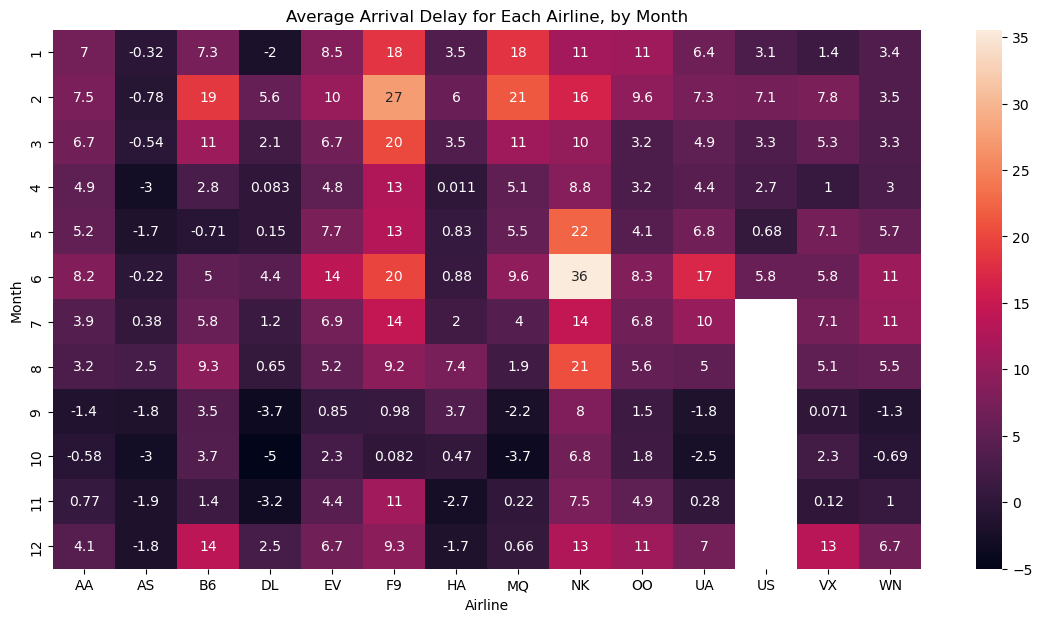

In [5]:
# Create a Heat map with the entire data

# plot size, title, plot, label
plt.figure(figsize=(14, 7))
plt.title("Average Arrival Delay for Each Airline, by Month")
sns.heatmap(data=flight_data, annot=True)
plt.xlabel("Airline")


# Scatter plots
* Dataset: synthetic data of insurance charges   
* Learn About the: [dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)
* Question: 
> ***Why are some customers paying more premiums than others?***   
![](https://storage.googleapis.com/kaggle-media/learn/images/1nmy2YO.png)

**1. Data file path & read**

In [6]:
# path
insurance_filepath = "/kaggle/input/data-for-datavis/insurance.csv"

# read
insurance_data = pd.read_csv(insurance_filepath)

**2. Check the data**

In [7]:
insurance_data.describe()
insurance_data.head()
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**3. Scatter plot with x-axis and y-axis**

<Axes: xlabel='bmi', ylabel='charges'>

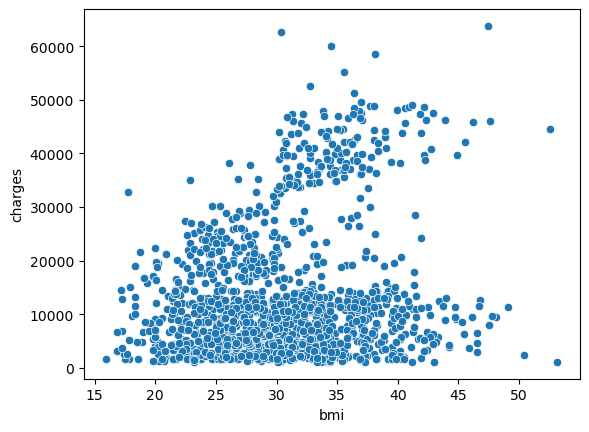

In [8]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

**4. Observe the correlation**
* 'bmi'([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)) and 'charges' showing positively related, higher BMI --> higher health risk -> higher charges
* **Regression line** to display the **strength** of the correlation


<Axes: xlabel='bmi', ylabel='charges'>

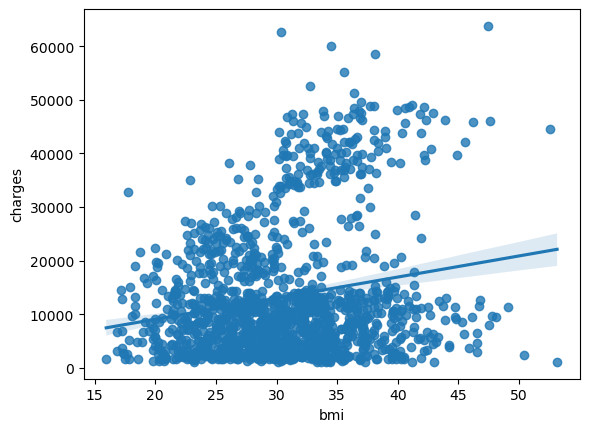

In [9]:
# regression line using regplot - the line that best fits the data
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

**5. Add another variable to the plot, how does it affect the relationship between bmi and charges?**

<Axes: xlabel='bmi', ylabel='charges'>

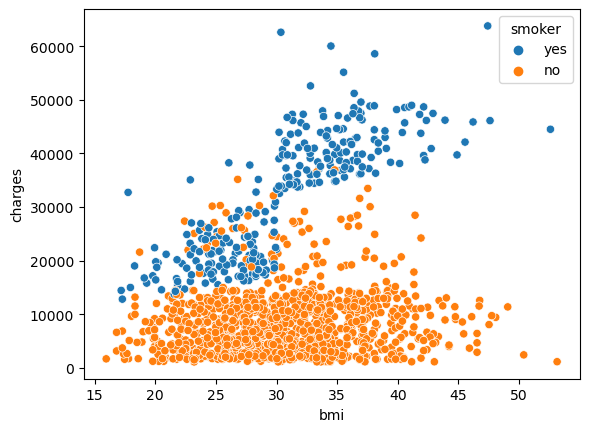

In [10]:
# Add 'smoker' field to the existing scatter plot, using color code (hue=)
sns.scatterplot(x=insurance_data['bmi'],y=insurance_data['charges'],hue=insurance_data['smoker'])

**6. Observe the correlation**
* nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.
* **How strong** is the correlations? Draw regression lines for each group - nonsmokers, smokers
* sns.lmplot(): Linear Model Plot, Observe the **slope of each line**


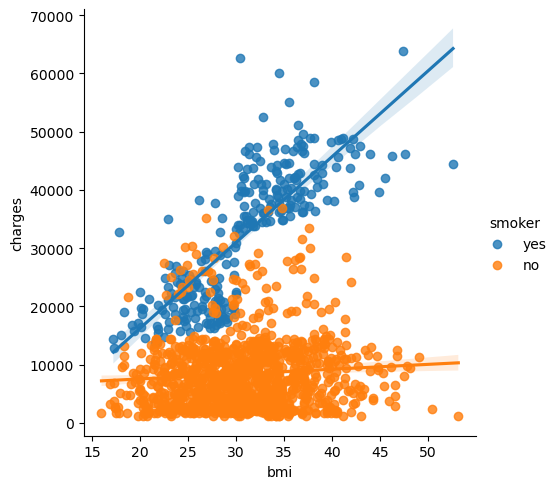

In [11]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance_data)

**7. Draw Swarm Plot using sns.swarmplot()**     

Usually, we use **scatter plots** to highlight the relationship between **two continuous variables** (like "bmi" and "charges"). However, we can adapt the design of the scatter plot to feature a **categorical variable (like "smoker") on one of the main axes**, referred as **categorical scatter plot**

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


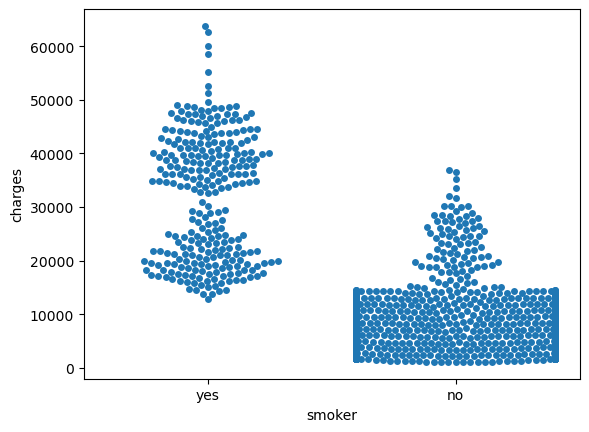

In [12]:
# draw swarmplot() with 'smoker' on x-axis and 'charges' on y-axis
# smoker - categorical variable
# charges - continuous variable
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'])

**8. Observe the correlation**
* on average, non-smokers are charged less than smokers, and
* the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.

**Recap: Scatter Plots**   
**scenario:**
* You work for a major candy producer.   
* Your goal is to write a report that your company can use to guide the design of its next product.   
* Soon after starting your research, you stumble across this very interesting [dataset](https://fivethirtyeight.com/videos/the-ultimate-halloween-candy-power-ranking/) containing results from a fun survey to crowdsource favorite candies.   


**Setup**

In [13]:
# import packages and settings
import pandas as pd
pd.plotting.deregister_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup complet.")

Setup complet.


**Step 1: Load the Data**   
candy.csv

In [14]:
# path to the data file
candy_filepath = "/kaggle/input/data-for-datavis/candy.csv"

# load the data, set 'id' column as row index
candy_data = pd.read_csv(candy_filepath, index_col="id")

**Step 2: Review the data**

In [15]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


* '**competitorname**' contains the name of the candy bar.
* the next **9** columns (from '**chocolate**' to '**pluribus**') describe the candy. For instance, rows with chocolate candies have "**Yes**" in the 'chocolate' column (and candies without chocolate have "**No**" in the same column).
* '**sugarpercent**' provides some indication of the amount of sugar, where higher values signify higher sugar content.
* '**pricepercent**' shows the price per unit, relative to the other candies in the dataset.
* '**winpercent**' is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents.
1. > Which candy was more popular with survey respondents: '3 Musketeers' or 'Almond Joy'?   
1. > Which candy has higher sugar content: 'Air Heads' or 'Baby Ruth'?

**Step 3: The role of sugar**
> *Do people tend to refer candies with higher sugar content?*

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

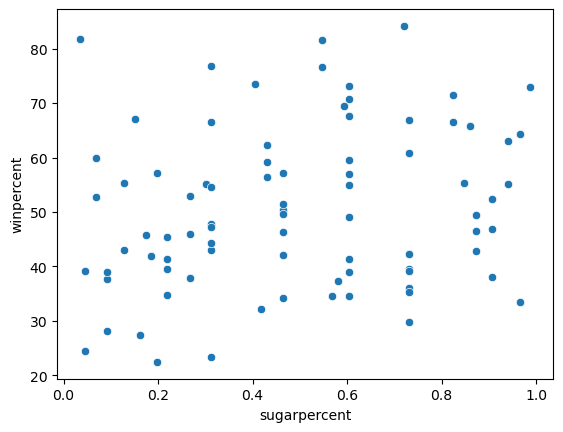

In [16]:
# Create a scatter plot to shows the relationship between
# 'sgarpercent' on x-axis and winpercent on y-axis

#sns.scatterplot(x='sugarpercent', y='winpercent', data=candy_data)
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data[
    'winpercent'])


> *Does the scatter plot show a **strong** correlation between the two variables? If so, are candies with more sugar relatively more or less popular with the survey respondents? *    

The scatter plot does not show a strong correlation between the two variables. Since there is **no clear relationship** between the two variables, this tells us that **sugar content does not play a strong role in candy popularity.**

**Step 4: Take a closer look**     

Create the same scatter plot with **regression line** this time - seaborn.regplot()

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

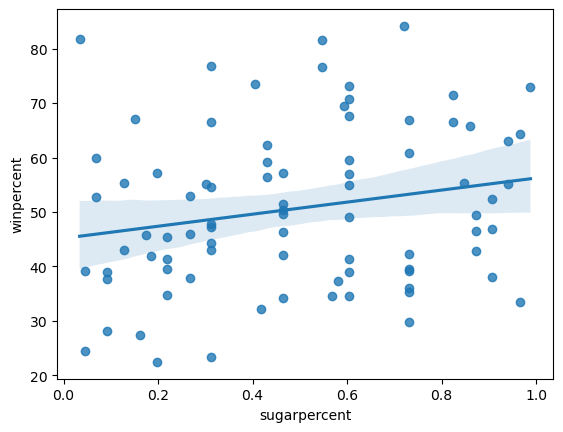

In [17]:
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

> *According to the plot above, is there a **slight** correlation between 'winpercent' and 'sugarpercent'? What does this tell you about the candy that people tend to prefer?*  

Since the regression line has a **slightly positive slope**, this tells us that there is a slightly positive correlation between 'winpercent' and 'sugarpercent'. Thus, people have a slight preference for candies containing relatively more sugar.

**Step 5: Chocolate!**
Create a scatter plot to show the relationship between '**pricepercent**' (on the horizontal x-axis) and '**winpercent**' (on the vertical y-axis). Use the 'chocolate' column to **color-code** the points

<Axes: xlabel='pricepercent', ylabel='winpercent'>

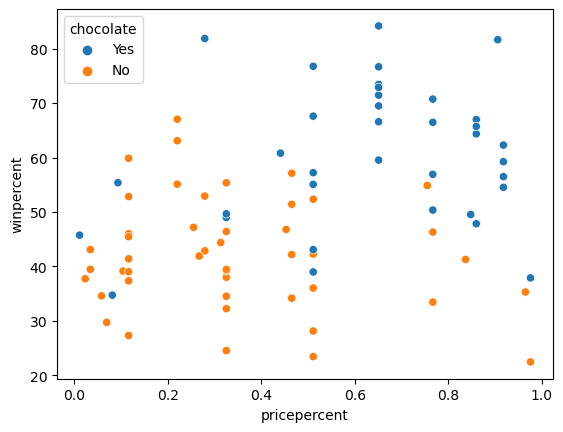

In [18]:
# Scatter plot showing the relationship between 'pricepercent'   
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data["chocolate"])

**Step 6: Investigate chocolate**

Create the same scatter plot you created in Step 5, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

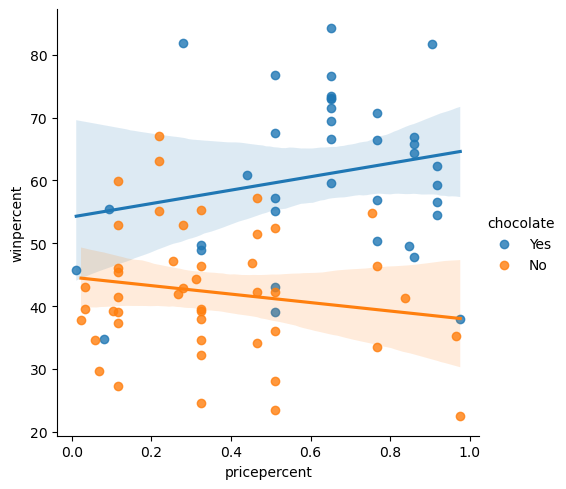

In [19]:
sns.lmplot(x='pricepercent', y='winpercent', hue='chocolate', data=candy_data)

Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?

> *Looking at positive or negative slope...Since this line has a slightly positive slope, we can say that more expensive chocolate candies tend to be more popular (than relatively cheaper chocolate candies). Likewise, since the regression line for candies without chocolate has a negative slope, we can say that if candies don't contain chocolate, they tend to be more popular when they are cheaper. One important note, however, is that the dataset is quite small -- so we shouldn't invest too much trust in these patterns! To inspire more confidence in the results, we should add more candies to the dataset.*


**Step 7: Everybody loves chocolate**   
Categorical scatter with categorical value

<Axes: xlabel='chocolate', ylabel='winpercent'>

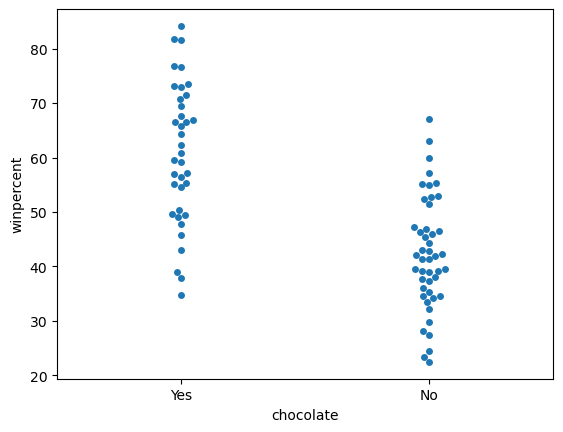

In [20]:
# scatter plot showing the relationshiop between'chocolate' and    
# 'winpercent' - 'chocolate' is a categorical value
sns.swarmplot(x=candy_data['chocolate'], y=candy_data['winpercent'])


You decide to dedicate a section of your report to the fact that chocolate candies tend to be more popular than candies without chocolate. Which plot is more appropriate to tell this story: the plot from **Step 6**, or the plot from **Step 7**?   
> *Which plot communicates more information? In general, it's good practice to **use the simplest plot** that tells the **entire story** of interest.* In this case, the categorical scatter plot from Step 7 is the more appropriate plot. While both plots tell the desired story, **the plot from Step 6 conveys far more information that could distract** from the main point.

# Distributions (Histogram and Density Plot)